# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import gmaps
from scipy.stats import linregress
import scipy.stats as st

# gmaps API Keys
from config import (api_key)
#from config import (gkey)

In [2]:
# pip install citipy
from citipy import citipy

In [3]:
city = citipy.nearest_city(22.99, 120.21)
city

print ({city.city_name})
print ({city.country_code}) 

{'tainan'}
{'tw'}


## Generate Cities List

In [4]:
cities_list = []
latitude_longitude_pairs = []
np.random.seed(250)  # to allow others to duplicate 
lats = np.random.randint(-90.00, 90.00, size=2000)
longs = np.random.randint(-180.00, 180.00, size=2000)
latitude_longitude_pairs = zip(lats, longs) 

city_table_df = pd.DataFrame(columns = ['Latitude', 'Longitude', 'City'])

for latitude_longitude_pair in latitude_longitude_pairs:
    returned_city = citipy.nearest_city(latitude_longitude_pair[0],latitude_longitude_pair[1]).city_name
    
    if returned_city not in cities_list:
       cities_list.append(returned_city) 
       city_table_df = city_table_df.append({'Latitude' : latitude_longitude_pair[0], 'Longitude' : latitude_longitude_pair[1], 'City' : returned_city}, ignore_index = True)  
        
#len(list_of_cities)  
city_table_df.head(20)

,Latitude,Longitude,City
0,20,-54,saint-francois
1,-13,156,gizo
2,-65,-173,vaini
3,-32,79,bambous virieux
4,-39,-143,mataura
5,66,-67,pangnirtung
6,-61,22,bredasdorp
7,-1,104,simpang
8,75,-11,husavik
9,22,-105,ruiz


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

query_url = f"{url}appid={api_key}&units={units}&q="
# api.openweathermap.org/data/2.5/weather?q=London,uk&APPID=

In [12]:
# set up lists to hold reponse info
lat = []
long = []
maxtemp = []
humid = []
wind = []
speed = []
cloud = []
cities2 = []
country = []
dt = []

text_file = open("citylog.txt","w",encoding='utf8')
# Loop through the list of cities and perform a request for data on each
for city in cities_list:
    response = requests.get(query_url + city).json()
    
    try:
        lat.append(response['coord']['lat'])
        long.append(response['coord']['lon'])
        maxtemp.append(response['main']['temp_max'])
        humid.append(response['main']['humidity'])
        wind.append(response['wind']['speed'])
        cloud.append(response['clouds']['all'])
        cities2.append(response['name'])
        country.append(response['sys']['country'])
        dt.append(response['dt'])
        print(f"City Id and Name: " + str(response['id']) + f" " + response['name'], file=text_file) 
   
    except:
        pass

print('this message') 
text_file.close()

this message


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [13]:
weather_datasofar = {"city": cities2,
                     "country": country,
                     "latitude": lat,
                     "longitude": long,
                     "max temp": maxtemp,
                     "humidity": humid,
                     "wind speed": wind,
                     "cloudiness": cloud,
                     "datetime": dt}
weather_guide_df = pd.DataFrame(weather_datasofar)
weather_guide_df 

,city,country,latitude,longitude,max temp,humidity,wind speed,cloudiness,datetime
0,Saint-François,FR,46.4154,3.9054,44.60,87,4.61,90,1619921072
1,Gizo Government Station,SB,-8.1030,156.8419,82.54,71,2.48,100,1619921072
2,Vaini,TO,-21.2000,-175.2000,78.80,73,17.27,75,1619921073
3,Bambous Virieux,MU,-20.3428,57.7575,73.99,94,5.75,75,1619921073
4,Mataura,NZ,-46.1927,168.8643,60.01,77,5.99,67,1619921073
...,...,...,...,...,...,...,...,...,...
666,Kafanchan,NG,9.5833,8.3000,75.38,66,5.48,18,1619921256
667,Bhasāwar,IN,27.0333,77.0333,88.25,24,7.02,100,1619921257
668,Znamenskoye,RU,57.1281,73.8282,45.93,44,11.79,88,1619921257
669,Atbasar,KZ,51.8000,68.3333,49.26,43,11.01,47,1619921257


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [14]:
#  Dump to CSV and confirm if any cities have humidity over 100%.

weather_guide_df.to_csv(r'..\Weather Guide.csv', index = False)

In [15]:
#  Make a new DataFrame equal to the city data to drop all humidity outliers by index.  Passing
#  "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

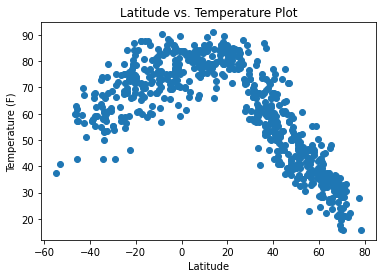

In [16]:
#  The following contrasts temperature with the latitudes on both sides of the Equator.  This plot
#  may indicate a Spring/Fall timing, depending on latitude.

x_values = weather_guide_df['latitude']
y_values = weather_guide_df['max temp']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.title('Latitude vs. Temperature Plot')
plt.show()

## Latitude vs. Humidity Plot

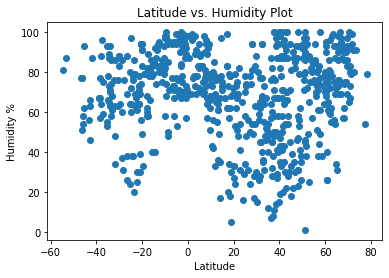

In [17]:
#  The following compares humidity with the latitudes both sides of the Equator.

x_values = weather_guide_df['latitude']
y_values = weather_guide_df['humidity']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
plt.title('Latitude vs. Humidity Plot')
plt.show()

## Latitude vs. Cloudiness Plot

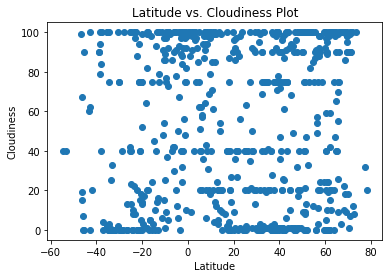

In [18]:
#  The following compares cloudiness with the latitudes both sides of the Equator.

x_values = weather_guide_df['latitude']
y_values = weather_guide_df['cloudiness']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Latitude vs. Cloudiness Plot')
plt.show()

## Latitude vs. Wind Speed Plot

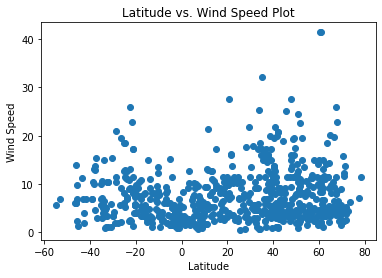

In [19]:
#  The following compares wind speeds with the latitudes both sides of the Equator.

x_values = weather_guide_df['latitude']
y_values = weather_guide_df['wind speed']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Latitude vs. Wind Speed Plot')
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

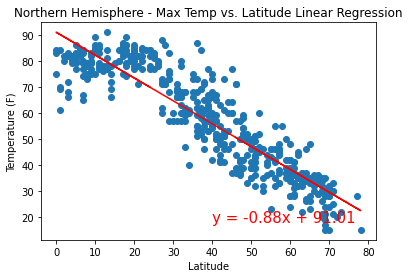

In [20]:
#  The following compares max temp with the latitudes south of the Equator.  Temperatures are 
#  receding quickly further away from the Equator.

weather_guide_df2 = weather_guide_df.loc[weather_guide_df['latitude'] > 0]
x_values = weather_guide_df2['latitude'].tolist()
#print(x_values) 
y_values = weather_guide_df2['max temp']
#weather_guide2.dtypes
y_values = np.array(y_values,int)
x_values = np.array(x_values,int)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,18),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.show()


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

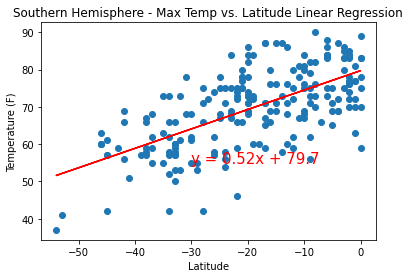

In [21]:
#  The following compares max temp with the latitudes south of the Equator.  Temperatures will
#  trend warmer closer to the Equator.

weather_guide_df2 = weather_guide_df.loc[weather_guide_df['latitude'] < 0]
x_values = weather_guide_df2['latitude'].tolist()
#print(x_values) 
y_values = weather_guide_df2['max temp']

y_values = np.array(y_values,int)
x_values = np.array(x_values,int)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,55),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

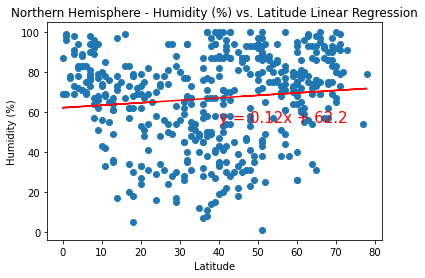

In [22]:
#  The following compares humidity % with the latitudes north of the Equator.  Humidity % does
#  appear to trend up at 50% or more across the spread of latitudes.

weather_guide_df2 = weather_guide_df.loc[weather_guide_df['latitude'] > 0]
x_values = weather_guide_df2['latitude'].tolist()
#print(x_values) 
y_values = weather_guide_df2['humidity']

y_values = np.array(y_values,int)
x_values = np.array(x_values,int)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,55),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

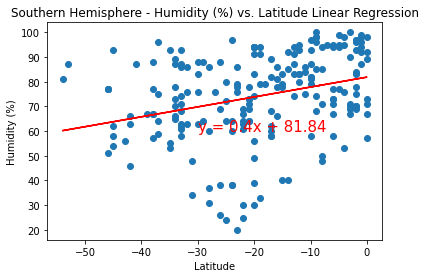

In [23]:
#  The following compares humidity % with the latitudes south of the Equator.  Humidity % does
#  appear to trend up closer to the equator.

weather_guide_df2 = weather_guide_df.loc[weather_guide_df['latitude'] < 0]
x_values = weather_guide_df2['latitude'].tolist()
#print(x_values) 
y_values = weather_guide_df2['humidity']

y_values = np.array(y_values,int)
x_values = np.array(x_values,int)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,60),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

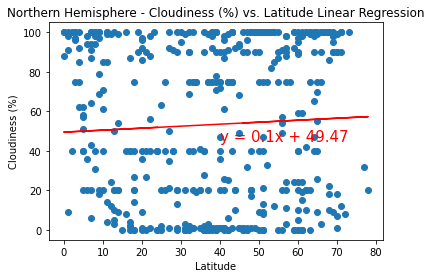

In [24]:
#  The following compares cloudiness % with the latitudes north of the Equator.

weather_guide_df2 = weather_guide_df.loc[weather_guide_df['latitude'] > 0]
x_values = weather_guide_df2['latitude'].tolist()
#print(x_values) 
y_values = weather_guide_df2['cloudiness']

y_values = np.array(y_values,int)
x_values = np.array(x_values,int)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,45),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

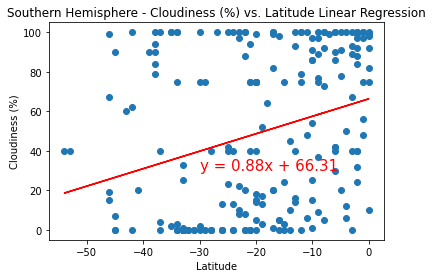

In [25]:
#  The following compares cloudiness % with the latitudes south of the Equator.

weather_guide_df2 = weather_guide_df.loc[weather_guide_df['latitude'] < 0]
x_values = weather_guide_df2['latitude'].tolist()
#print(x_values) 
y_values = weather_guide_df2['cloudiness']

y_values = np.array(y_values,int)
x_values = np.array(x_values,int)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,30),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

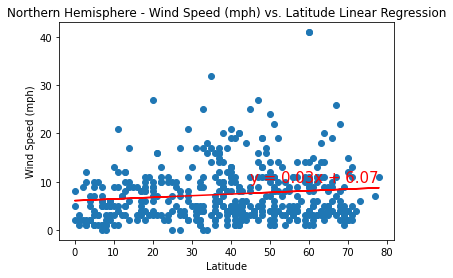

In [26]:
#  The following compares wind speeds with the latitudes north of the Equator.

weather_guide_df2 = weather_guide_df.loc[weather_guide_df['latitude'] > 0]
x_values = weather_guide_df2['latitude'].tolist()
#print(x_values) 
y_values = weather_guide_df2['wind speed']

y_values = np.array(y_values,int)
x_values = np.array(x_values,int)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

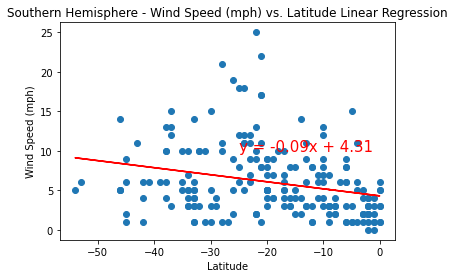

In [27]:
#  The following compares wind speeds with the latitudes south of the Equator.

weather_guide_df2 = weather_guide_df.loc[weather_guide_df['latitude'] < 0]
x_values = weather_guide_df2['latitude'].tolist()
#print(x_values) 
y_values = weather_guide_df2['wind speed']

y_values = np.array(y_values,int)
x_values = np.array(x_values,int)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
plt.show()